### Data engineering
## Dataset : PEMS-SF
### Created: March 20, 2025
### Author: Edgar Acuna 

In [2]:
# imports
import numpy as np
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot


# load a single file as a numpy array
#def load_file(filepath):
#    dataframe = read_csv(filepath, header=None)
#    return dataframe.values

In [3]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training dataset

In [5]:
# loading Training data
X, y = load_data("PEMS-SF",split="Train")
print(y.shape[1])

 Shape of X =  (267, 963, 144)
 Shape of y =  (267,)
 New shape of X =  (267, 144, 963)
 New shape of y =  (267, 7)
7


In [6]:
X.shape

(267, 144, 963)

In [7]:
#class size in training
import numpy as np
np.sum(y,axis=0)

array([32, 32, 38, 42, 43, 36, 44])

In [8]:
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

In [9]:

yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [10]:
#Extracting the time series by class
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
X5=X[yo==4]
X6=X[yo==5]
X7=X[yo==6]
print(X3.shape)

(38, 144, 963)


In [11]:
#Calculating the means of the dimensions in each group
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
Xa5=X5.mean(axis=0).T
Xa5=pd.DataFrame(Xa5)
Xa6=X6.mean(axis=0).T
Xa6=pd.DataFrame(Xa6)
Xa7=X7.mean(axis=0).T
Xa7=pd.DataFrame(Xa7)
print(Xa2.shape)

(963, 144)


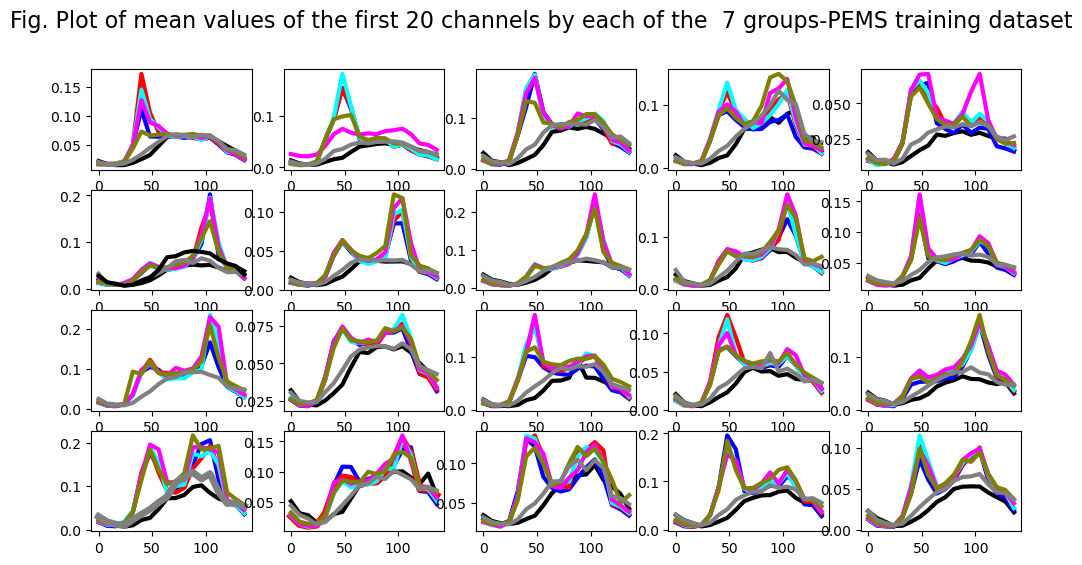

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(4, 5,figsize=(12,6))
ejex=np.arange(0,144,8)
fig.suptitle("Fig. Plot of mean values of the first 20 channels by each of the  7 groups-PEMS training dataset",fontsize=16)
ax[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='G1')
ax[0,0].plot(ejex,Xa2.iloc[0,ejex], color='blue', lw=3,  label='G1')
ax[0,0].plot(ejex, Xa3.iloc[0,ejex], color='red', lw=3, label='G1')
ax[0,0].plot(ejex, Xa4.iloc[0,ejex], color='cyan',lw=3, label='G1')
ax[0,0].plot(ejex,Xa5.iloc[0,ejex], color='magenta', lw=3,  label='G1')
ax[0,0].plot(ejex, Xa6.iloc[0,ejex], color='olive', lw=3, label='G1')
ax[0,0].plot(ejex, Xa7.iloc[0,ejex], color='gray',lw=3, label='G2')
ax[0,1].plot(ejex, Xa1.iloc[1,ejex], color='black',lw=3, label='G1')
ax[0,1].plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=3,  label='G1')
ax[0,1].plot(ejex, Xa3.iloc[1,ejex], color='red', lw=3, label='G1')
ax[0,1].plot(ejex, Xa4.iloc[1,ejex], color='cyan',lw=3, label='G1')
ax[0,1].plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=3,  label='G1')
ax[0,1].plot(ejex, Xa6.iloc[1,ejex], color='olive', lw=3, label='G1')
ax[0,1].plot(ejex, Xa7.iloc[1,ejex], color='gray',lw=3, label='G1')
ax[0,2].plot(ejex,Xa1.iloc[2,ejex], color='black', lw=3,  label='G1')
ax[0,2].plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=3, label='G1')
ax[0,2].plot(ejex, Xa3.iloc[2,ejex], color='red',lw=3, label='G2')
ax[0,2].plot(ejex, Xa4.iloc[2,ejex], color='cyan',lw=3, label='G1')
ax[0,2].plot(ejex,Xa5.iloc[2,ejex], color='magenta', lw=3,  label='G1')
ax[0,2].plot(ejex, Xa6.iloc[2,ejex], color='olive', lw=3, label='G1')
ax[0,2].plot(ejex,Xa7.iloc[2,ejex], color='gray', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa1.iloc[3,ejex], color='black', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa2.iloc[3,ejex], color='blue', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa3.iloc[3,ejex], color='red', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa4.iloc[3,ejex], color='cyan', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa5.iloc[3,ejex], color='magenta', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa6.iloc[3,ejex], color='olive', lw=3,   label='G2')
ax[0,3].plot(ejex, Xa7.iloc[3,ejex], color='gray', lw=3, label='G2')
ax[0,4].plot(ejex,Xa1.iloc[4,ejex], color='black', lw=3,   label='G2')
ax[0,4].plot(ejex, Xa2.iloc[4,ejex], color='blue', lw=3, label='G2')
ax[0,4].plot(ejex,Xa3.iloc[4,ejex], color='red', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa4.iloc[4,ejex], color='cyan', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa5.iloc[4,ejex], color='magenta', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa6.iloc[4,ejex], color='olive', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa7.iloc[4,ejex], color='gray', lw=3,   label='G2')
ax[1,0].plot(ejex, Xa1.iloc[5,ejex], color='black',lw=3, label='G1')
ax[1,0].plot(ejex,Xa2.iloc[5,ejex], color='blue', lw=3,  label='G1')
ax[1,0].plot(ejex, Xa3.iloc[5,ejex], color='red', lw=3, label='G1')
ax[1,0].plot(ejex, Xa4.iloc[5,ejex], color='cyan',lw=3, label='G1')
ax[1,0].plot(ejex,Xa5.iloc[5,ejex], color='magenta', lw=3,  label='G1')
ax[1,0].plot(ejex, Xa6.iloc[5,ejex], color='olive', lw=3, label='G1')
ax[1,0].plot(ejex, Xa7.iloc[5,ejex], color='gray',lw=3, label='G2')
ax[1,1].plot(ejex, Xa1.iloc[6,ejex], color='black',lw=3, label='G1')
ax[1,1].plot(ejex,Xa2.iloc[6,ejex], color='blue', lw=3,  label='G1')
ax[1,1].plot(ejex, Xa3.iloc[6,ejex], color='red', lw=3, label='G1')
ax[1,1].plot(ejex, Xa4.iloc[6,ejex], color='cyan',lw=3, label='G1')
ax[1,1].plot(ejex,Xa5.iloc[6,ejex], color='magenta', lw=3,  label='G1')
ax[1,1].plot(ejex, Xa6.iloc[6,ejex], color='olive', lw=3, label='G1')
ax[1,1].plot(ejex, Xa7.iloc[6,ejex], color='gray',lw=3, label='G1')
ax[1,2].plot(ejex,Xa1.iloc[7,ejex], color='black', lw=3,  label='G1')
ax[1,2].plot(ejex, Xa2.iloc[7,ejex], color='blue', lw=3, label='G1')
ax[1,2].plot(ejex, Xa3.iloc[7,ejex], color='red',lw=3, label='G2')
ax[1,2].plot(ejex, Xa4.iloc[7,ejex], color='cyan',lw=3, label='G1')
ax[1,2].plot(ejex,Xa5.iloc[7,ejex], color='magenta', lw=3,  label='G1')
ax[1,2].plot(ejex, Xa6.iloc[7,ejex], color='olive', lw=3, label='G1')
ax[1,2].plot(ejex,Xa7.iloc[7,ejex], color='gray', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa1.iloc[8,ejex], color='black', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa2.iloc[8,ejex], color='blue', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa3.iloc[8,ejex], color='red', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa4.iloc[8,ejex], color='cyan', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa5.iloc[8,ejex], color='magenta', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa6.iloc[8,ejex], color='olive', lw=3,   label='G2')
ax[1,3].plot(ejex, Xa7.iloc[8,ejex], color='gray', lw=3, label='G2')
ax[1,4].plot(ejex,Xa1.iloc[9,ejex], color='black', lw=3,   label='G2')
ax[1,4].plot(ejex, Xa2.iloc[9,ejex], color='blue', lw=3, label='G2')
ax[1,4].plot(ejex,Xa3.iloc[9,ejex], color='red', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa4.iloc[9,ejex], color='cyan', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa5.iloc[9,ejex], color='magenta', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa6.iloc[9,ejex], color='olive', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa7.iloc[9,ejex], color='gray', lw=3,   label='G2')
ax[1,0].plot(ejex, Xa1.iloc[10,ejex], color='black',lw=3, label='G1')
ax[2,0].plot(ejex,Xa2.iloc[10,ejex], color='blue', lw=3,  label='G1')
ax[2,0].plot(ejex, Xa3.iloc[10,ejex], color='red', lw=3, label='G1')
ax[2,0].plot(ejex, Xa4.iloc[10,ejex], color='cyan',lw=3, label='G1')
ax[2,0].plot(ejex,Xa5.iloc[10,ejex], color='magenta', lw=3,  label='G1')
ax[2,0].plot(ejex, Xa6.iloc[10,ejex], color='olive', lw=3, label='G1')
ax[2,0].plot(ejex, Xa7.iloc[10,ejex], color='gray',lw=3, label='G2')
ax[2,1].plot(ejex, Xa1.iloc[11,ejex], color='black',lw=3, label='G1')
ax[2,1].plot(ejex,Xa2.iloc[11,ejex], color='blue', lw=3,  label='G1')
ax[2,1].plot(ejex, Xa3.iloc[11,ejex], color='red', lw=3, label='G1')
ax[2,1].plot(ejex, Xa4.iloc[11,ejex], color='cyan',lw=3, label='G1')
ax[2,1].plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=3,  label='G1')
ax[2,1].plot(ejex, Xa6.iloc[11,ejex], color='olive', lw=3, label='G1')
ax[2,1].plot(ejex, Xa7.iloc[11,ejex], color='gray',lw=3, label='G1')
ax[2,2].plot(ejex,Xa1.iloc[12,ejex], color='black', lw=3,  label='G1')
ax[2,2].plot(ejex, Xa2.iloc[12,ejex], color='blue', lw=3, label='G1')
ax[2,2].plot(ejex, Xa3.iloc[12,ejex], color='red',lw=3, label='G2')
ax[2,2].plot(ejex, Xa4.iloc[12,ejex], color='cyan',lw=3, label='G1')
ax[2,2].plot(ejex,Xa5.iloc[12,ejex], color='magenta', lw=3,  label='G1')
ax[2,2].plot(ejex, Xa6.iloc[12,ejex], color='olive', lw=3, label='G1')
ax[2,2].plot(ejex,Xa7.iloc[12,ejex], color='gray', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa1.iloc[13,ejex], color='black', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa2.iloc[13,ejex], color='blue', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa3.iloc[13,ejex], color='red', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa4.iloc[13,ejex], color='cyan', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa5.iloc[13,ejex], color='magenta', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa6.iloc[13,ejex], color='olive', lw=3,   label='G2')
ax[2,3].plot(ejex, Xa7.iloc[13,ejex], color='gray', lw=3, label='G2')
ax[2,4].plot(ejex,Xa1.iloc[14,ejex], color='black', lw=3,   label='G2')
ax[2,4].plot(ejex, Xa2.iloc[14,ejex], color='blue', lw=3, label='G2')
ax[2,4].plot(ejex,Xa3.iloc[14,ejex], color='red', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa4.iloc[14,ejex], color='cyan', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa5.iloc[14,ejex], color='magenta', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa6.iloc[14,ejex], color='olive', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa7.iloc[14,ejex], color='gray', lw=3,   label='G2')
ax[3,0].plot(ejex, Xa1.iloc[15,ejex], color='black',lw=3, label='G1')
ax[3,0].plot(ejex,Xa2.iloc[15,ejex], color='blue', lw=3,  label='G1')
ax[3,0].plot(ejex, Xa3.iloc[15,ejex], color='red', lw=3, label='G1')
ax[3,0].plot(ejex, Xa4.iloc[15,ejex], color='cyan',lw=3, label='G1')
ax[3,0].plot(ejex,Xa5.iloc[15,ejex], color='magenta', lw=3,  label='G1')
ax[3,0].plot(ejex, Xa6.iloc[15,ejex], color='olive', lw=3, label='G1')
ax[3,0].plot(ejex, Xa7.iloc[15,ejex], color='gray',lw=5, label='G2')
ax[3,1].plot(ejex, Xa1.iloc[16,ejex], color='black',lw=3, label='G1')
ax[3,1].plot(ejex,Xa2.iloc[16,ejex], color='blue', lw=3,  label='G1')
ax[3,1].plot(ejex, Xa3.iloc[16,ejex], color='red', lw=5, label='G1')
ax[3,1].plot(ejex, Xa4.iloc[16,ejex], color='cyan',lw=3, label='G1')
ax[3,1].plot(ejex,Xa5.iloc[16,ejex], color='magenta', lw=3,  label='G1')
ax[3,1].plot(ejex, Xa6.iloc[16,ejex], color='olive', lw=3, label='G1')
ax[3,1].plot(ejex, Xa7.iloc[16,ejex], color='gray',lw=3, label='G1')
ax[3,2].plot(ejex,Xa1.iloc[17,ejex], color='black', lw=3,  label='G1')
ax[3,2].plot(ejex, Xa2.iloc[17,ejex], color='blue', lw=3, label='G1')
ax[3,2].plot(ejex, Xa3.iloc[17,ejex], color='red',lw=3, label='G2')
ax[3,2].plot(ejex, Xa4.iloc[17,ejex], color='cyan',lw=3, label='G1')
ax[3,2].plot(ejex,Xa5.iloc[17,ejex], color='magenta', lw=3,  label='G1')
ax[3,2].plot(ejex, Xa6.iloc[17,ejex], color='olive', lw=3, label='G1')
ax[3,2].plot(ejex,Xa7.iloc[17,ejex], color='gray', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa1.iloc[18,ejex], color='black', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa2.iloc[18,ejex], color='blue', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa3.iloc[18,ejex], color='red', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa4.iloc[18,ejex], color='cyan', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa5.iloc[18,ejex], color='magenta', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa6.iloc[18,ejex], color='olive', lw=3,   label='G2')
ax[3,3].plot(ejex, Xa7.iloc[18,ejex], color='gray', lw=3, label='G2')
ax[3,4].plot(ejex,Xa1.iloc[19,ejex], color='black', lw=3,   label='G2')
ax[3,4].plot(ejex, Xa2.iloc[19,ejex], color='blue', lw=3, label='G2')
ax[3,4].plot(ejex,Xa3.iloc[19,ejex], color='red', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa4.iloc[19,ejex], color='cyan', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa5.iloc[19,ejex], color='magenta', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa6.iloc[19,ejex], color='olive', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa7.iloc[19,ejex], color='gray', lw=3,   label='G2')
#ax.legend(loc='best', frameon=False)
plt.show()

In [13]:
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)

In [14]:
#Boxplots of each feature inthe groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
#temptr.boxplot(by='group')
#temptr.groupby('group').mean()

### Distances between gropus training dataset

In [16]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)
tempoA1=pd.DataFrame(tempoA)
tempoA1.var()

(257121, 144)


0      0.002715
1      0.002688
2      0.002269
3      0.002351
4      0.002674
         ...   
139    0.001874
140    0.003084
141    0.002019
142    0.003175
143    0.002320
Length: 144, dtype: float64

### Distances between groups-training data

In [18]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.02013686, 0.02091654, 0.01772934, 0.01781015, 0.0174329 ,
       0.02019202, 0.01752607, 0.01944542, 0.02294145, 0.02263479,
       0.02314776, 0.01846112, 0.02188732, 0.02220235, 0.02083193,
       0.01716847, 0.01937454, 0.01838379, 0.01787231, 0.01899045,
       0.01608347])

In [19]:
distances.max()

0.023147761844696288

In [20]:
distances.min()

0.016083473681340648

In [21]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(144,)

In [22]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()
a.shape

(7, 144)

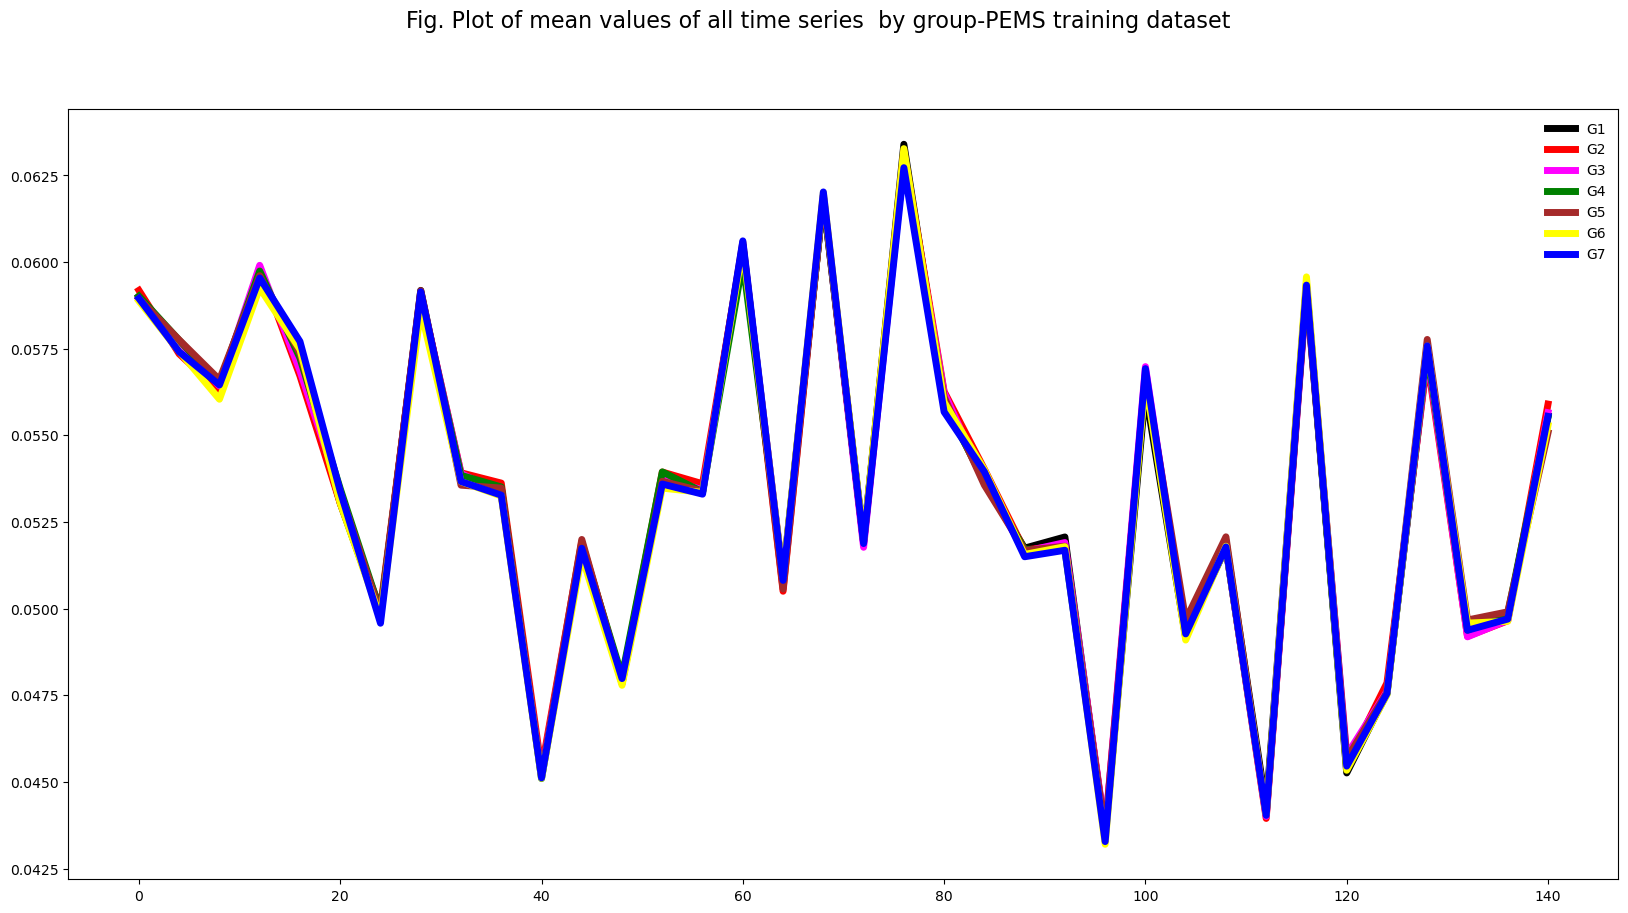

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,144,4)
fig.suptitle("Fig. Plot of mean values of all time series  by group-PEMS training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='magenta', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, a.iloc[4,ejex], color='brown', lw=5, label='G5')
ax.plot(ejex, a.iloc[5,ejex], color='yellow', lw=5,  label='G6')
ax.plot(ejex, a.iloc[6,ejex], color='blue', lw=5, label='G7')
ax.legend(loc='best', frameon=False)
plt.show()

### Feature Selection

In [25]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:144]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/144

9.722222222222221

In [26]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/144

0.6944444444444444

In [27]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.003)
Xv_new=selector.fit_transform(Xm)
Xv_new.shape

(257121, 13)

### Testing dataset

In [29]:
# loading Testing data
Xt, yt = load_data("PEMS-SF",split="Test")

 Shape of X =  (173, 963, 144)
 Shape of y =  (173,)
 New shape of X =  (173, 144, 963)
 New shape of y =  (173, 7)


In [30]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([30, 25, 26, 23, 22, 27, 20])

In [31]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [32]:
#Boxplot of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
#pyplot.boxplot(tempodfte)
#pyplot.show()

(24912, 963)


In [33]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.17341040462427745

In [34]:
tempoAt=Xt.reshape(Xt.shape[1],-1).T
print(tempoAt.shape)
tempoA1t=pd.DataFrame(tempoAt)
tempoA1t.var()

(166599, 144)


0      0.002007
1      0.002113
2      0.001689
3      0.002680
4      0.002378
         ...   
139    0.002321
140    0.002088
141    0.002850
142    0.003448
143    0.002868
Length: 144, dtype: float64

In [35]:
#media total testung
meanTe=tempoA1t.mean(axis=0)
meanTe.shape

(144,)

In [36]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

0.11633014735516721

In [37]:
tempoBt=pd.DataFrame(tempoAt)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoBt['group'] = [next(variables) for variable in range(len(tempoBt))]
#Bboxplot  of features by class
at=tempoBt.groupby('group').mean()
at.shape

(7, 144)

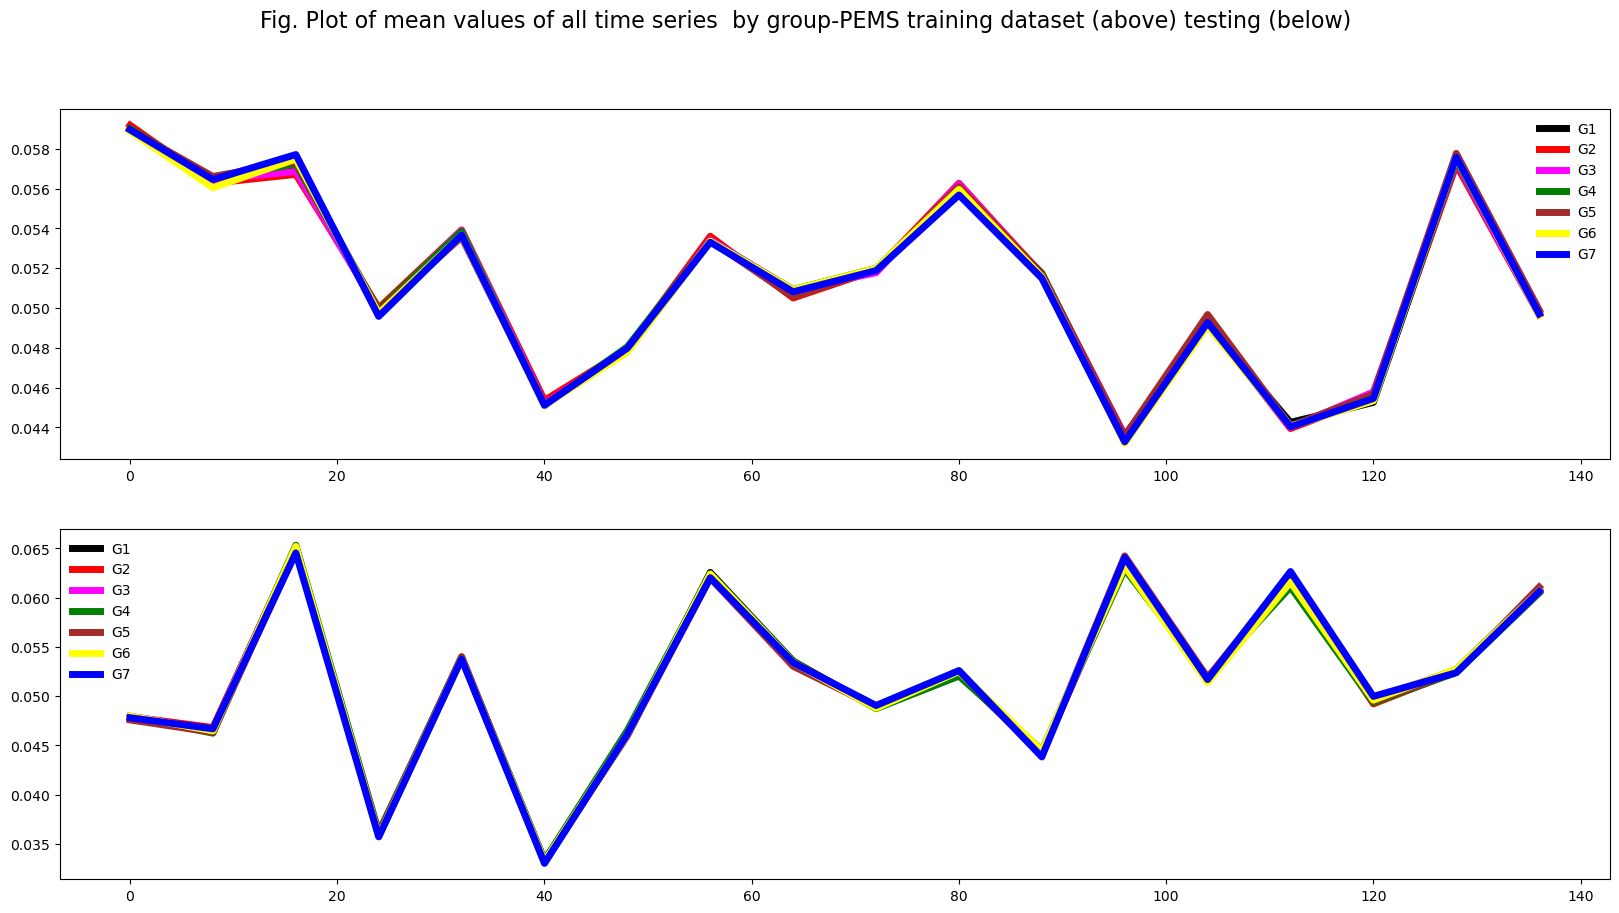

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
ejex=np.arange(0,144,8)
fig.suptitle("Fig. Plot of mean values of all time series  by group-PEMS training dataset (above) testing (below) ",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='magenta', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='green', lw=5,  label='G4')
ax1.plot(ejex, a.iloc[4,ejex], color='brown', lw=5, label='G5')
ax1.plot(ejex, a.iloc[5,ejex], color='yellow', lw=5,  label='G6')
ax1.plot(ejex, a.iloc[6,ejex], color='blue', lw=5, label='G7')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, at.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,at.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, at.iloc[2,ejex], color='magenta', lw=5, label='G3')
ax2.plot(ejex, at.iloc[3,ejex], color='green', lw=5,  label='G4')
ax2.plot(ejex, at.iloc[4,ejex], color='brown', lw=5, label='G5')
ax2.plot(ejex, at.iloc[5,ejex], color='yellow', lw=5,  label='G6')
ax2.plot(ejex, at.iloc[6,ejex], color='blue', lw=5, label='G7')
ax2.legend(loc='best', frameon=False)
plt.show()

### Stationarity

In [40]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[50,0:144]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.347722
p-value: 0.012875
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


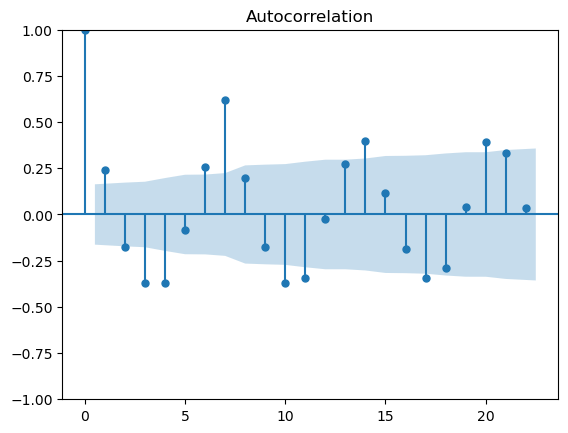

In [41]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)